# Unit 5 - Financial Planning

In [26]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [27]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [28]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [29]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [30]:
# Fetch current BTC price
btc_request = requests.get(btc_url)
btc_data = btc_request.json()
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_request = requests.get(eth_url)
eth_data = eth_request.json()
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = float(btc_price) * my_btc
my_eth_value = float(eth_price) * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $66368.83
The current value of your 5.3 ETH is $20651.87


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [31]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [32]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
from alpaca_trade_api.rest import REST, TimeFrame
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version='v2')



In [33]:
# Format current date as ISO format
from datetime import date, timedelta
import datetime
 
# set open and close day and with limit of 1000
today = date.today()
td = timedelta(1000)
open_day = today - td
open_day
close_day = today - timedelta(1) 
openday = open_day.strftime("%Y-%m-%d")
closeday = close_day.strftime("%Y-%m-%d")
#Set the tickers
tickers = ["AGG", "SPY"]

# Get current closing prices for SPY and AGG
df = alpaca.get_bars(tickers, TimeFrame.Day,openday, closeday, adjustment='raw').df
df
df.index = df.index.date
df1 = pd.pivot_table(df,values='close', index=df.index, columns = ['symbol'])

# Preview DataFrame
df1

symbol,AGG,SPY
2019-07-01,111.18,295.66
2019-07-02,111.38,296.43
2019-07-03,111.56,298.80
2019-07-05,111.09,298.46
2019-07-08,111.03,296.82
...,...,...
2022-03-21,107.04,444.30
2022-03-22,106.75,449.59
2022-03-23,107.19,443.80
2022-03-24,106.95,450.48


In [34]:
# Pick AGG and SPY close prices
agg_close_price = df1.iloc[-1][0]
spy_close_price = df1.iloc[-1][1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.1
Current SPY closing price: $452.69


In [35]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22634.50
The current value of your 200 AGG shares is $21220.00


### Savings Health Analysis

In [36]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value
data = {'amount':[crypto,shares]}
# Create savings DataFrame
df_savings = pd.DataFrame(data, index = ['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,87020.696353
shares,43854.500000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

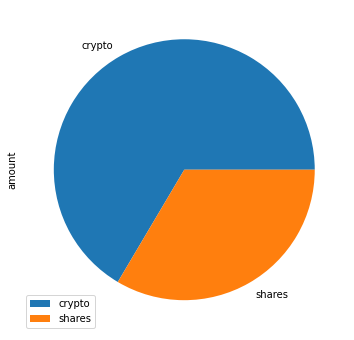

In [37]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True, figsize=(11, 6))

In [38]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())
total_savings
# Validate saving health
if total_savings > emergency_fund:
    print("congratulating the person for having enough money in this fund.")
elif total_savings == emergency_fund:
    print("congratulating the person on reaching this financial goal.")
else:
    print(f"${emergency_fund - total_savings} dollars away the person is from reaching the goal.")

congratulating the person for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [39]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = '2016-05-01'
end_date = '2021-05-01'

In [74]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
data = alpaca.get_bars('AGG', TimeFrame.Day, start_date, end_date, adjustment='raw').df
data.drop(columns=['trade_count','vwap'], inplace=True)
name = 'AGG'
#data.index=data.index.date
col = pd.MultiIndex.from_product([[name],data.columns])
col
data.columns = col
data

data2 = alpaca.get_bars('SPY', TimeFrame.Day, start_date, end_date, adjustment='raw').df
data2.drop(columns=['trade_count','vwap'], inplace=True)
name2 = 'SPY'
#data2.index=data2.index.date
col2 = pd.MultiIndex.from_product([[name2],data2.columns])
col2
data2.columns = col2
data2
df_stock_data = data.merge(data2, how="inner", left_index=True, right_index=True)
df_stock_data
# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                              SPY                                     
                             open    high     low   close     volume  
timestamp                                                             
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515  
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142  
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810  
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222  
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004

In [82]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thrityyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [83]:
# Printing the simulation input data
MC_thrityyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                           SPY                          \
                          daily_return    open    high     low   close   
timestamp                                                                
2016-05-02 04:00:00+00:00          NaN  206.90  208.18  206.41  208.03   
2016-05-03 04:00:00+00:00     0.001808  206.50  206.80  205.28  206.13   
2016-05-04 04:00:00+00:00     0.000451  205.00  205.85  204.42  204.96   
2016-05-05 04:00:00+00:00     0.002526  205.57  205.98  204.47  204.95   
2016-05-06 04:00:00+00:00    -0.001530  204.04  205.77  203.88  205.70   

                                                   
                              volume daily_return  
timestamp                                          
2016-05-02 04:00:00+00:00   61908515          NaN  
2016-05-03 04:00:00+00:00  106422142    -0.009133  
2016-05-04 04:00:00+00:00   92199810    -0.005676  
2016-05-05 04:00:00+00:00   67597222    -0.000049  
2016-05-06 04:00:00+00:00   89131004     0.003659

In [84]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thrityyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Jeff\Desktop\git\API-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997434,1.004792,1.003038,0.994978,0.990701,0.993896,0.994541,1.005873,1.002980,1.006568,...,1.011462,1.015025,1.009470,1.000815,1.003442,1.006843,0.996734,1.004476,0.997796,0.999753
2,0.994179,0.998245,0.995670,0.993366,0.987048,1.001021,0.984321,1.003111,1.003627,1.016640,...,1.015696,1.007149,1.000549,0.997299,1.002527,1.010488,0.995329,1.012773,0.989710,1.018681
3,1.003162,0.990044,0.992888,0.991523,0.979630,0.994723,0.992151,0.994610,0.999852,1.012211,...,1.011959,1.008552,0.996206,0.998871,1.001111,1.007330,1.006432,1.024387,1.002429,1.024054
4,1.020832,0.990024,0.986932,0.981119,0.976817,0.990689,0.988943,0.992119,1.003519,1.009072,...,1.018275,1.008593,1.009664,0.993315,0.998819,1.001694,1.004560,1.033040,1.000536,1.027375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.640534,12.057630,13.473854,6.864360,8.034291,58.168286,9.087650,4.863403,32.924575,28.216012,...,3.640874,9.213222,15.878809,68.920939,19.724738,8.033495,13.747356,19.849320,15.289965,46.349854
7557,14.567252,12.038351,13.469065,6.948227,8.138042,58.402625,9.198168,4.823724,32.718879,27.816793,...,3.645716,9.168444,15.871844,69.738843,19.823338,8.098887,13.652944,19.812837,15.334544,46.160246
7558,14.493208,12.109204,13.424329,6.943341,8.138093,58.484084,9.130930,4.852204,32.697930,27.678252,...,3.633971,9.202965,15.954331,69.727438,19.799517,8.115009,13.644529,19.675984,15.399462,46.340671
7559,14.384456,12.086473,13.318134,7.016358,8.206913,58.250439,9.203090,4.777116,32.602984,27.604922,...,3.609666,9.271042,15.863907,69.935672,19.641344,8.112007,13.860732,19.686251,15.471256,46.041109


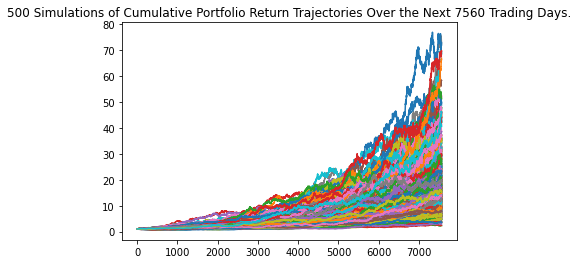

In [96]:
# Plot simulation outcomes
line_plot = MC_thrityyear.plot_simulation()
line_plot.get_figure().savefig("MC_thrityyear_sim_plot.png", bbox_inches="tight")

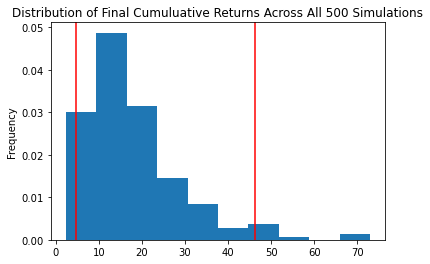

In [97]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thrityyear.plot_distribution()
dist_plot.get_figure().savefig('MC_thrityyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [88]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thrityyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             17.798222
std              11.329118
min               2.331452
25%              10.286755
50%              14.678741
75%              22.247578
max              72.983678
95% CI Lower      4.725579
95% CI Upper     46.184723
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [89]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47255.79 and $461847.23


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [90]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $47255.79 and $461847.23


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [91]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [92]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Jeff\Desktop\git\API-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993344,0.992713,1.011761,0.987741,1.000025,1.005972,1.013844,1.005884,1.009626,1.005082,...,0.988434,0.979067,1.000505,0.989345,1.002401,1.007458,1.002276,1.002155,0.987718,1.000965
2,0.981684,0.988223,1.008763,0.988332,1.007792,0.998984,1.020146,1.008512,1.014242,1.006523,...,0.976843,0.980251,0.997937,0.993241,1.009017,1.003097,0.999518,0.994141,0.992499,1.000981
3,0.985374,0.993038,1.019629,0.986189,1.009682,1.002442,1.020336,0.997809,1.015552,1.005510,...,0.991631,0.968571,0.985827,1.003054,1.004061,0.995312,0.998724,0.999481,0.998599,0.986797
4,0.971510,0.987428,1.027239,0.985982,1.011028,1.007800,1.010287,0.997306,1.015942,1.009858,...,1.000306,0.976267,0.985077,1.009425,0.999434,0.999802,0.998491,1.002410,0.998353,0.986574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.384035,2.033834,2.152332,1.828799,2.617617,1.322077,1.212306,1.304042,1.615227,1.474374,...,1.437577,1.709717,1.801047,1.437419,2.482447,1.076828,1.967583,1.597153,2.033071,1.209909
1257,1.380070,2.020871,2.142472,1.827980,2.619088,1.319228,1.208319,1.320988,1.616145,1.489632,...,1.440866,1.691153,1.814832,1.437868,2.508769,1.076697,1.932195,1.574246,2.053267,1.214949
1258,1.381327,2.006115,2.140614,1.816517,2.603425,1.311887,1.209690,1.313267,1.597358,1.481219,...,1.441772,1.675222,1.823309,1.441072,2.513274,1.082985,1.937509,1.586536,2.064210,1.220090
1259,1.388954,2.011058,2.147739,1.820736,2.619277,1.330615,1.220643,1.316685,1.605289,1.474415,...,1.447363,1.678221,1.822011,1.453232,2.500888,1.078317,1.943281,1.568953,2.051088,1.219524


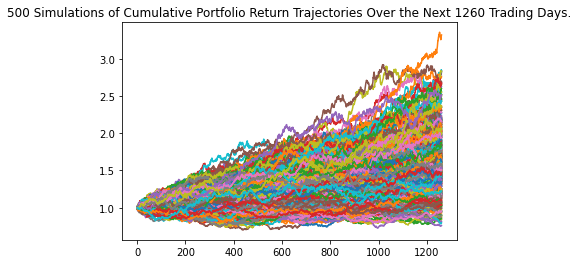

In [95]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

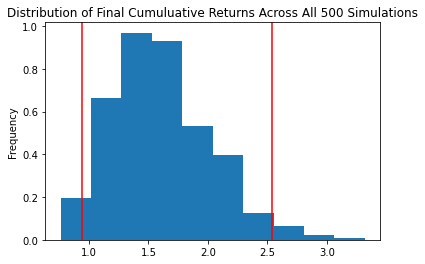

In [98]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [102]:
# Fetch summary statistics from the Monte Carlo simulation results
tb2 = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tb2)

count           500.000000
mean              1.612263
std               0.410375
min               0.761244
25%               1.328921
50%               1.572126
75%               1.848886
max               3.320402
95% CI Lower      0.944707
95% CI Upper      2.536485
Name: 1260, dtype: float64


In [103]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tb2[8]*10000,2)
ci_upper_five = round(tb2[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $9447.07 and $25364.85


### Ten Years Retirement Option

In [104]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [105]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Jeff\Desktop\git\API-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997285,0.994458,1.005621,1.003691,0.991509,1.006609,1.010311,1.016002,0.992923,0.981457,...,1.011101,1.004312,1.003705,0.997605,0.988585,0.999241,0.995660,0.987093,0.996017,0.991102
2,1.010536,0.991258,1.007296,1.005231,0.982174,1.004409,1.001052,1.017301,0.994353,0.985625,...,1.007213,1.005680,1.001895,0.981949,0.995778,1.012074,0.993924,0.965965,1.005640,0.987409
3,1.010045,1.006250,1.004009,1.007547,0.985734,1.003180,0.994487,1.031048,0.998706,0.982388,...,1.003491,1.002717,0.998279,0.979641,0.999823,1.016587,1.002074,0.957578,1.017418,0.990210
4,1.005092,1.024509,1.005865,1.007164,0.989843,0.999763,1.005960,1.032120,0.989929,0.989452,...,1.000698,0.999597,1.002573,0.983299,1.004239,1.012760,0.998010,0.966613,1.014098,0.985062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.547698,3.908386,1.858963,2.244607,2.698026,2.959954,2.712285,1.030748,2.603214,2.624607,...,2.208588,1.945697,1.560345,3.892749,2.816831,2.742341,3.179335,3.209071,1.457632,1.296042
2517,2.532737,3.893522,1.889648,2.280686,2.683594,2.953746,2.742099,1.041492,2.594585,2.629341,...,2.195828,1.915085,1.570009,3.903242,2.819323,2.764279,3.168238,3.199819,1.477385,1.296711
2518,2.547874,3.884983,1.889589,2.297294,2.694503,2.923538,2.715952,1.049707,2.611564,2.624211,...,2.192897,1.913219,1.575445,3.922624,2.861832,2.773367,3.145832,3.236556,1.474853,1.302025
2519,2.533919,3.955037,1.879075,2.291071,2.712388,2.912726,2.722702,1.066726,2.584331,2.619760,...,2.179158,1.920958,1.550277,3.897941,2.851783,2.764335,3.167551,3.239556,1.469935,1.315048


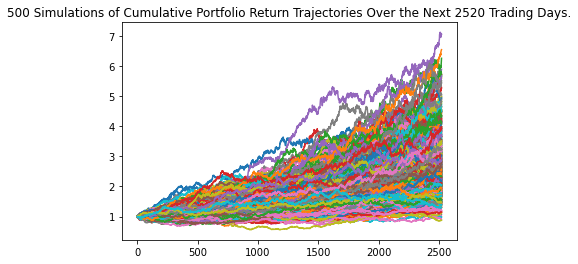

In [106]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()
line_plot.get_figure().savefig("MC_tenyear_sim_plot.png", bbox_inches="tight")

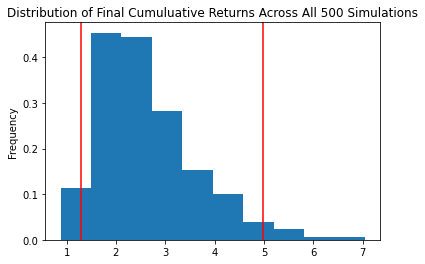

In [107]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()
dist_plot.get_figure().savefig('MC_tenyear_dist_plot.png',bbox_inches='tight')

In [109]:
# Fetch summary statistics from the Monte Carlo simulation results
tb3 = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tb3)

count           500.000000
mean              2.637018
std               0.988401
min               0.876461
25%               1.898534
50%               2.488239
75%               3.087710
max               7.047109
95% CI Lower      1.296630
95% CI Upper      4.989023
Name: 2520, dtype: float64


In [110]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tb3[8]*10000,2)
ci_upper_ten = round(tb3[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $12966.3 and $49890.23
